In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df_orders = pd.read_pickle('/Users/pkc/Dropbox/Mac/Desktop/Python/python-for-mbas/Part 2/pickles/df_orders.pickle')

In [42]:
df_items = pd.read_pickle('/Users/pkc/Dropbox/Mac/Desktop/Python/python-for-mbas/Part 2/pickles/df_items.pickle')

In [43]:
df_restaurants = (pd.read_pickle('/Users/pkc/Dropbox/Mac/Desktop/Python/python-for-mbas/Part 2/pickles/df_restaurants.pickle'))

In [44]:
df_full_time = pd.read_excel('/Users/pkc/Dropbox/Mac/Desktop/Python/python-for-mbas/Part 2/raw data/university.xlsx',sheet_name='full_time')


In [45]:
df_part_time = pd.read_excel('/Users/pkc/Dropbox/Mac/Desktop/Python/python-for-mbas/Part 2/raw data/university.xlsx',sheet_name='part_time')

In [46]:
df_grades = pd.read_excel('/Users/pkc/Dropbox/Mac/Desktop/Python/python-for-mbas/Part 2/raw data/university.xlsx',sheet_name='grades')

In [47]:
df_grades

,student_id,final_grade
0,1,95
1,3,71
2,6,76
3,7,91
4,8,75
5,11,59
6,15,86


In [48]:
df_students = (pd.concat([df_full_time,df_part_time]).reset_index(drop=True))

In [49]:
df_students

,student_id,first_name,last_name,adviser
0,1,Melvin,Ware,Prof Duncan
1,2,Thomas,Moore,Prof Brown
2,3,Joseph,Paul,Prof Alvarez
3,4,Sarah,Cruz,Prof Duncan
4,5,David,Freeman,Prof Duncan
5,6,Elizabeth,Brown,Prof Duncan
6,7,Amanda,Schultz,Prof Kennedy
7,8,Tanner,Perkins,Prof Alvarez
8,9,Ashley,Gonzales,Prof Kennedy
9,10,Latonya,Porter,Prof Alvarez


In [50]:
fullMerge = pd.merge(df_grades,df_students,left_on='student_id',right_on='student_id',how='outer')

In [51]:
gradeMerge = pd.merge(df_grades,df_students,left_on='student_id',right_on='student_id',how='left',validate='one_to_one')

In [52]:
df_grades_2 = df_grades.copy().set_index('student_id')

In [53]:
df_students_2 = df_students.copy().set_index('student_id')

In [54]:
df_students_2['python_grade']=df_grades_2.final_grade

In [55]:
df_result = pd.merge(df_grades, df_students[['student_id','first_name','last_name']], left_on='student_id',right_on='student_id',how='left')

In [56]:
if df_result.first_name.isnull().sum()>0 :
    print('warning, df_students is missing some students')

warning, df_students is missing some students


In [57]:
df_result = df_result[df_result.first_name.notnull()]

In [58]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9


In [59]:
df_restaurants.head()

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,8/9/2014,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,3/19/2013,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,11/14/2013,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,10/12/2015,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,1/10/2014,2017-01-01


In [60]:
df_res = ( pd.merge(df_orders, df_restaurants[['RESTAURANT_ID','NAME']],
                    left_on='RESTAURANT_ID',
                    right_on='RESTAURANT_ID',
                    how='left')
           .rename(columns={'NAME':'RESTAURANT_NAME'}
                    ))

In [61]:
df_res.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg


In [62]:
( pd.merge(df_res,
           df_items[['ITEM_ID','ITEM_NAME']],
           left_on='MAIN',
           right_on='ITEM_ID',
           how='left'
           )
  .rename(columns={'ITEM_NAME':'MAIN_NAME'})).head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,ITEM_ID,MAIN_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,I0,Charred Chicken Marketbowl
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,I0,Charred Chicken Marketbowl
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,I1,Spicy Meatballs Marketbowl


In [63]:
df_res = ( pd.merge(df_res,
                    df_items[['ITEM_ID','ITEM_NAME']],
                    left_on='MAIN',
                    right_on='ITEM_ID',
                    how='left'
                    )
           .rename(columns={'ITEM_NAME':'MAIN_NAME'}).drop(columns='ITEM_ID'))

In [64]:
df_res.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl


<Axes: xlabel='MAIN_NAME'>

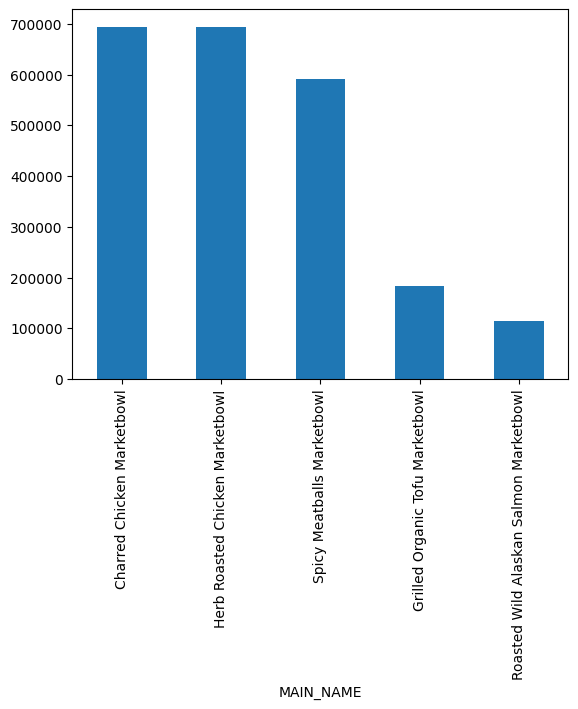

In [65]:
df_res.MAIN_NAME.value_counts().plot(kind='bar')

In [66]:
df_res.to_pickle('/Users/pkc/Dropbox/Mac/Desktop/Python/python-for-mbas/Part 2/Chapter 7/orders.pickle')